In [319]:
import pandas as pd
import final_project.utils.paths as path
import numpy
import talib

Leemos archivo de SPY en temporalidad 1D

In [320]:
df=pd.read_csv(path.data_processed_dir("SPYVD.csv"))
pd.options.display.float_format='{:,.2f}'.format


In [321]:
df.loc[df['DayWeek']=='Tuesday'].to_csv(path.data_processed_dir("SPYVDT.csv"),index=False)

Agregamos una columna con el número 1 , para contar las variables categoricas
Ademas agragamos columnas con los rangos par los indicadores:
    .Rangos ATR
    .Rangos RSI
    .Rangos Variacion Diaria

In [322]:
df['ones'] = 1
df['Bins_ATR']=pd.cut(df['ATRREAL'],bins=[1,4.5,7,10,13,16])
df['Bins_RSI']=pd.cut(df['RSI'],bins=[15,35,47,60,72,90])
df['Bins_%D']=pd.cut(df['%D'],bins=[-5,-2.8,-1.2,-1,-0.5,0,0.5,1,1.9,4])

Seteamos las variables de calculo

In [323]:
df['year']=df.year.astype("category")
df['month']=df.month.astype("category")
df['day']=df.day.astype("category")
df['DayWeek']=df.DayWeek.astype("category")
df['DayStatus']=df.DayStatus.astype("category")
df['BackStatus']=df.BackStatus.astype("category")
df['TBackStatus']=df.TBackStatus.astype("category")
df.convert_dtypes().dtypes

year           category
month          category
day            category
DayWeek        category
OpenOk          Float64
HighOk          Float64
LowOk           Float64
Closeok         Float64
%D              Float64
DayStatus      category
MA200           Float64
MA50            Float64
EMA21           Float64
EMA8            Float64
P/8             boolean
8/21            boolean
21/50           boolean
50/200          boolean
ATRREAL         Float64
MACDHIST        Float64
MACD            Float64
MACDSignal      Float64
Engulfing         Int64
DCC               Int64
Doji              Int64
IHAMER            Int64
HAMER             Int64
2Crows            Int64
3BCrows           Int64
Momentum        Float64
RSI             Float64
BackStatus     category
TBackStatus    category
ones              Int64
Bins_ATR       category
Bins_RSI       category
Bins_%D        category
dtype: object

In [324]:
df.columns

Index(['year', 'month', 'day', 'DayWeek', 'OpenOk', 'HighOk', 'LowOk',
       'Closeok', '%D', 'DayStatus', 'MA200', 'MA50', 'EMA21', 'EMA8', 'P/8',
       '8/21', '21/50', '50/200', 'ATRREAL', 'MACDHIST', 'MACD', 'MACDSignal',
       'Engulfing', 'DCC', 'Doji', 'IHAMER', 'HAMER', '2Crows', '3BCrows',
       'Momentum', 'RSI', 'BackStatus', 'TBackStatus', 'ones', 'Bins_ATR',
       'Bins_RSI', 'Bins_%D'],
      dtype='object')

Contar los numeros de dias que hay en el DataFrame por año

In [325]:
df.groupby(['year','DayWeek'])['Closeok'].count()

year  DayWeek  
2014  Friday       50
      Monday       47
      Thursday     50
      Tuesday      51
      Wednesday    52
2015  Friday       49
      Monday       48
      Thursday     51
      Tuesday      52
      Wednesday    52
2016  Friday       50
      Monday       45
      Thursday     51
      Tuesday      52
      Wednesday    52
2017  Friday       50
      Monday       46
      Thursday     51
      Tuesday      51
      Wednesday    52
2018  Friday       51
      Monday       47
      Thursday     51
      Tuesday      51
      Wednesday    50
2019  Friday       51
      Monday       48
      Thursday     50
      Tuesday      52
      Wednesday    50
2020  Friday       49
      Monday       48
      Thursday     52
      Tuesday      52
      Wednesday    52
Name: Closeok, dtype: int64

In [326]:
df

,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,DayStatus,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
0,2014,1,2,Thursday,183.97,184.06,182.48,182.94,-0.56,-1,...,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,"(-1.0, -0.5]"
1,2014,1,3,Friday,183.19,183.59,182.63,182.79,-0.22,-1,...,0,0,NaN,NaN,-1.00,NaN,1,NaN,NaN,"(-0.5, 0.0]"
2,2014,1,6,Monday,183.46,183.55,182.08,182.39,-0.58,-1,...,0,0,NaN,NaN,-1.00,-1.00,1,NaN,NaN,"(-1.0, -0.5]"
3,2014,1,7,Tuesday,183.09,183.78,182.95,183.44,0.19,1,...,0,0,NaN,NaN,-1.00,-1.00,1,NaN,NaN,"(0.0, 0.5]"
4,2014,1,8,Wednesday,183.45,183.82,182.89,183.53,0.04,1,...,0,0,NaN,NaN,1.00,-1.00,1,NaN,NaN,"(0.0, 0.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2020,12,24,Thursday,368.05,371.81,367.45,371.37,0.90,1,...,0,0,4.66,63.29,-1.00,-1.00,1,"(1.0, 4.5]","(60.0, 72.0]","(0.5, 1.0]"
1752,2020,12,28,Monday,371.75,372.58,371.07,372.13,0.10,1,...,0,0,5.86,64.32,1.00,-1.00,1,"(1.0, 4.5]","(60.0, 72.0]","(0.0, 0.5]"
1753,2020,12,29,Tuesday,373.81,373.99,370.82,371.47,-0.63,-1,...,0,0,6.87,62.68,1.00,1.00,1,"(1.0, 4.5]","(60.0, 72.0]","(-1.0, -0.5]"
1754,2020,12,30,Wednesday,372.33,373.07,371.57,371.92,-0.11,-1,...,0,0,2.37,63.36,-1.00,1.00,1,"(1.0, 4.5]","(60.0, 72.0]","(-0.5, 0.0]"


Anulamos todos los datos NAN

In [327]:
df=df.dropna()

In [328]:
df

,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,DayStatus,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
197,2014,10,16,Thursday,183.04,188.51,182.89,188.20,2.82,1,...,0,0,-7.82,35.67,-1.00,-1.00,1,"(1.0, 4.5]","(35, 47]","(1.9, 4.0]"
198,2014,10,17,Friday,188.41,189.75,187.62,188.97,0.30,1,...,0,0,-8.33,38.03,1.00,-1.00,1,"(1.0, 4.5]","(35, 47]","(0.0, 0.5]"
199,2014,10,20,Monday,188.11,192.35,188.07,192.15,2.15,1,...,0,0,-2.87,46.70,1.00,1.00,1,"(1.0, 4.5]","(35, 47]","(1.9, 4.0]"
200,2014,10,21,Tuesday,191.66,194.71,191.48,194.64,1.55,1,...,0,0,1.43,52.33,1.00,1.00,1,"(1.0, 4.5]","(47, 60]","(1.0, 1.9]"
201,2014,10,22,Wednesday,194.41,194.90,192.61,194.44,0.02,1,...,0,0,-1.26,51.86,1.00,1.00,1,"(1.0, 4.5]","(47, 60]","(0.0, 0.5]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2020,12,24,Thursday,368.05,371.81,367.45,371.37,0.90,1,...,0,0,4.66,63.29,-1.00,-1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
1752,2020,12,28,Monday,371.75,372.58,371.07,372.13,0.10,1,...,0,0,5.86,64.32,1.00,-1.00,1,"(1.0, 4.5]","(60, 72]","(0.0, 0.5]"
1753,2020,12,29,Tuesday,373.81,373.99,370.82,371.47,-0.63,-1,...,0,0,6.87,62.68,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(-1.0, -0.5]"
1754,2020,12,30,Wednesday,372.33,373.07,371.57,371.92,-0.11,-1,...,0,0,2.37,63.36,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(-0.5, 0.0]"


Calculamos el tamaño de DataFrame

In [329]:
len(df)

1551

In [330]:
df.dtypes

year           category
month          category
day            category
DayWeek        category
OpenOk          float64
HighOk          float64
LowOk           float64
Closeok         float64
%D              float64
DayStatus      category
MA200           float64
MA50            float64
EMA21           float64
EMA8            float64
P/8                bool
8/21               bool
21/50              bool
50/200             bool
ATRREAL         float64
MACDHIST        float64
MACD            float64
MACDSignal      float64
Engulfing         int64
DCC               int64
Doji              int64
IHAMER            int64
HAMER             int64
2Crows            int64
3BCrows           int64
Momentum        float64
RSI             float64
BackStatus     category
TBackStatus    category
ones              int64
Bins_ATR       category
Bins_RSI       category
Bins_%D        category
dtype: object

In [331]:
df.describe()

,OpenOk,HighOk,LowOk,Closeok,%D,MA200,MA50,EMA21,EMA8,ATRREAL,...,Engulfing,DCC,Doji,IHAMER,HAMER,2Crows,3BCrows,Momentum,RSI,ones
count,"1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00",...,"1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00","1,551.00"
mean,255.98,257.48,254.43,256.12,0.06,246.53,253.30,254.92,255.68,3.24,...,-0.52,-0.64,12.89,0.84,1.74,0.00,0.00,1.24,55.88,1.00
std,45.59,45.90,45.23,45.60,0.88,39.65,43.23,44.50,45.23,2.10,...,31.10,8.01,33.53,9.12,13.08,0.00,0.00,8.53,11.61,0.00
min,182.33,184.09,181.02,183.06,-4.49,190.67,193.07,189.44,186.65,1.12,...,-100.00,-100.00,0.00,0.00,0.00,0.00,0.00,-74.92,17.81,1.00
25%,210.71,211.57,209.68,210.81,-0.31,206.16,209.65,209.82,210.43,1.96,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.58,48.27,1.00
50%,255.20,256.82,253.86,255.29,0.09,243.96,254.40,255.88,254.72,2.50,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.87,57.25,1.00
75%,288.08,290.09,286.40,288.63,0.48,277.43,286.28,286.96,288.60,3.98,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.33,64.00,1.00
max,373.81,374.65,371.57,373.86,3.96,323.36,357.86,368.08,371.19,15.78,...,100.00,0.00,100.00,100.00,100.00,0.00,0.00,38.95,87.34,1.00


Calculamos los valores por año, en el año 2014 tenemos pocos datos por que fueron eliminados los NAN de los calculos que no habian como MA200, MA50

In [332]:
df['year'].value_counts()

2015    251
2019    251
2016    250
2017    250
2018    249
2020    247
2014     53
Name: year, dtype: int64

Contando el numero de valores por mes

In [333]:
df['month'].value_counts()

10    145
12    145
11    142
8     131
3     128
6     128
5     127
7     127
9     122
1     121
4     120
2     115
Name: month, dtype: int64

Contando el numero de valores por día

In [334]:
df['day'].value_counts()

17    53
27    53
24    53
6     53
9     53
12    53
13    53
16    52
23    52
22    52
10    52
11    52
21    51
20    51
18    51
28    51
14    51
5     51
2     50
19    50
8     50
7     50
29    49
26    49
15    49
4     48
30    48
3     48
1     47
25    44
31    32
Name: day, dtype: int64

Calculando el porcentaje de representacion cada día en la base de datos

In [335]:
df['DayWeek'].value_counts()/df['DayWeek'].value_counts().sum() * 100

Tuesday     20.70
Wednesday   20.37
Thursday    20.31
Friday      19.86
Monday      18.76
Name: DayWeek, dtype: float64

calculando el numero de dias positivos y numero de  dias negativos

In [336]:
df.groupby(['DayWeek','DayStatus'])[['ones']].sum()

ones
DayWeek   DayStatus      
Friday    -1          128
          1           180
Monday    -1          122
          1           169
Thursday  -1          139
          1           176
Tuesday   -1          140
          1           181
Wednesday -1          141
          1           175

Calculamos el promedio de los indicadores para cada dia

In [337]:
df.groupby('DayWeek').mean()

,OpenOk,HighOk,LowOk,Closeok,%D,MA200,MA50,EMA21,EMA8,P/8,...,Engulfing,DCC,Doji,IHAMER,HAMER,2Crows,3BCrows,Momentum,RSI,ones
DayWeek,,,,,,,,,,,,,,,,,,,,,
Friday,256.25,257.75,254.69,256.48,0.09,246.55,253.28,255.06,255.94,0.67,...,0.00,-1.30,11.69,0.65,2.60,0.00,0.00,1.54,56.29,1.00
Monday,255.99,257.50,254.53,256.25,0.10,246.87,253.71,255.22,255.89,0.64,...,1.37,0.00,11.68,0.00,3.78,0.00,0.00,0.90,55.58,1.00
Thursday,255.96,257.57,254.37,256.11,0.06,246.89,253.59,255.07,255.74,0.63,...,-0.32,0.00,13.02,0.95,0.63,0.00,0.00,1.12,55.53,1.00
Tuesday,256.19,257.57,254.60,256.19,0.01,246.59,253.38,254.98,255.75,0.68,...,-0.31,-0.93,13.40,1.56,1.25,0.00,0.00,1.26,56.01,1.00
Wednesday,255.53,257.02,253.98,255.59,0.03,245.79,252.58,254.29,255.09,0.64,...,-3.16,-0.95,14.56,0.95,0.63,0.00,0.00,1.36,55.96,1.00


In [338]:
df.columns

Index(['year', 'month', 'day', 'DayWeek', 'OpenOk', 'HighOk', 'LowOk',
       'Closeok', '%D', 'DayStatus', 'MA200', 'MA50', 'EMA21', 'EMA8', 'P/8',
       '8/21', '21/50', '50/200', 'ATRREAL', 'MACDHIST', 'MACD', 'MACDSignal',
       'Engulfing', 'DCC', 'Doji', 'IHAMER', 'HAMER', '2Crows', '3BCrows',
       'Momentum', 'RSI', 'BackStatus', 'TBackStatus', 'ones', 'Bins_ATR',
       'Bins_RSI', 'Bins_%D'],
      dtype='object')

Analisis de los indicadores por año

Contando los dias por año donde se dieron una vela Doji

In [339]:
df[['year','Doji']].value_counts()

year  Doji
2018  0       227
2016  0       220
2015  0       219
2019  0       218
2017  0       213
2020  0       213
2014  0        41
2017  100      37
2020  100      34
2019  100      33
2015  100      32
2016  100      30
2018  100      22
2014  100      12
dtype: int64

In [340]:
df[['DayWeek','DayStatus']].value_counts().sort_index()

DayWeek    DayStatus
Friday     -1           128
           1            180
Monday     -1           122
           1            169
Thursday   -1           139
           1            176
Tuesday    -1           140
           1            181
Wednesday  -1           141
           1            175
dtype: int64

Calculando el porcentaje de variacion positiva y negativa

In [341]:
df[['DayWeek','DayStatus']].value_counts().sort_index()/df[['DayWeek','DayStatus']].value_counts().sort_index().sum()*100

DayWeek    DayStatus
Friday     -1           8.25
           1           11.61
Monday     -1           7.87
           1           10.90
Thursday   -1           8.96
           1           11.35
Tuesday    -1           9.03
           1           11.67
Wednesday  -1           9.09
           1           11.28
dtype: float64

Los Martes tenemos que un 11,67% positivos y un 9.03% negativos 

In [342]:
df.groupby(['DayWeek','DayStatus'])['DayStatus'].count()

DayWeek    DayStatus
Friday     -1           128
           1            180
Monday     -1           122
           1            169
Thursday   -1           139
           1            176
Tuesday    -1           140
           1            181
Wednesday  -1           141
           1            175
Name: DayStatus, dtype: int64

Creamos un DataFrame para el estudio de los dias Martes

In [343]:
df.loc[df['DayWeek']=='Tuesday']

,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,DayStatus,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
200,2014,10,21,Tuesday,191.66,194.71,191.48,194.64,1.55,1,...,0,0,1.43,52.33,1.00,1.00,1,"(1.0, 4.5]","(47, 60]","(1.0, 1.9]"
205,2014,10,28,Tuesday,196.81,199.11,196.73,199.08,1.15,1,...,0,0,13.22,61.94,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(1.0, 1.9]"
210,2014,11,4,Tuesday,201.22,201.59,200.06,201.10,-0.06,-1,...,0,0,6.46,62.83,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(-0.5, 0.0]"
215,2014,11,11,Tuesday,204.05,204.29,203.65,204.17,0.06,1,...,0,0,5.09,68.65,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.0, 0.5]"
220,2014,11,18,Tuesday,204.44,205.91,204.44,205.54,0.54,1,...,0,0,4.44,71.59,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2020,12,1,Tuesday,365.55,367.65,364.93,365.96,0.11,1,...,0,0,3.51,67.08,-1.00,-1.00,1,"(4.5, 7.0]","(60, 72]","(0.0, 0.5]"
1739,2020,12,8,Tuesday,367.70,370.77,367.67,370.14,0.66,1,...,0,0,12.71,70.10,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
1744,2020,12,15,Tuesday,367.37,369.57,365.92,369.55,0.59,1,...,0,0,3.59,64.75,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
1749,2020,12,22,Tuesday,368.20,368.33,366.03,367.21,-0.27,-1,...,0,0,-2.93,57.02,1.00,-1.00,1,"(1.0, 4.5]","(47, 60]","(-0.5, 0.0]"


In [344]:
dfTuesday=df.loc[df['DayWeek']=='Tuesday'].copy(deep=True)

dfTuesday=dfTuesday.dropna()



In [345]:
dfTuesday.reset_index()

,index,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
0,200,2014,10,21,Tuesday,191.66,194.71,191.48,194.64,1.55,...,0,0,1.43,52.33,1.00,1.00,1,"(1.0, 4.5]","(47, 60]","(1.0, 1.9]"
1,205,2014,10,28,Tuesday,196.81,199.11,196.73,199.08,1.15,...,0,0,13.22,61.94,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(1.0, 1.9]"
2,210,2014,11,4,Tuesday,201.22,201.59,200.06,201.10,-0.06,...,0,0,6.46,62.83,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(-0.5, 0.0]"
3,215,2014,11,11,Tuesday,204.05,204.29,203.65,204.17,0.06,...,0,0,5.09,68.65,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.0, 0.5]"
4,220,2014,11,18,Tuesday,204.44,205.91,204.44,205.54,0.54,...,0,0,4.44,71.59,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,1734,2020,12,1,Tuesday,365.55,367.65,364.93,365.96,0.11,...,0,0,3.51,67.08,-1.00,-1.00,1,"(4.5, 7.0]","(60, 72]","(0.0, 0.5]"
317,1739,2020,12,8,Tuesday,367.70,370.77,367.67,370.14,0.66,...,0,0,12.71,70.10,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
318,1744,2020,12,15,Tuesday,367.37,369.57,365.92,369.55,0.59,...,0,0,3.59,64.75,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
319,1749,2020,12,22,Tuesday,368.20,368.33,366.03,367.21,-0.27,...,0,0,-2.93,57.02,1.00,-1.00,1,"(1.0, 4.5]","(47, 60]","(-0.5, 0.0]"


Revisando el numero de datos para el DataFrame creado

In [346]:
dfTuesday.groupby(['DayStatus']).count()

,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,MA200,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
DayStatus,,,,,,,,,,,,,,,,,,,,,
-1,140,140,140,140,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
1,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181


Calculamos el porcentaje  positivos y negativos para el dia Martes

In [347]:
dfTuesday[['DayStatus']].value_counts().sort_index()/dfTuesday[['DayStatus']].value_counts().sort_index().sum()*100

DayStatus
-1          43.61
1           56.39
dtype: float64

In [372]:
dfTuesdayP=df.loc[(df['DayWeek']=='Tuesday')&(df['DayStatus']==1)].copy(deep=True)

Revisamos el detalle  para cada indicador

In [375]:
dfTuesdayP.groupby(['year','DayStatus']).describe()

OpenOk                                                 HighOk  \
                count   mean   std    min    25%    50%    75%    max  count   
year DayStatus                                                                 
2014 1           6.00 201.19  5.66 191.66 198.62 204.21 204.42 205.80   6.00   
2015 1          31.00 205.36  5.68 188.26 202.93 207.50 209.41 211.12  31.00   
2016 1          30.00 209.54 11.21 183.36 203.00 210.62 216.91 227.01  30.00   
2017 1          29.00 244.70 11.60 225.04 235.52 243.57 252.46 267.05  29.00   
2018 1          26.00 273.63  8.42 259.94 266.81 272.47 278.89 291.53  26.00   
2019 1          29.00 291.68 14.52 257.79 282.01 291.36 299.13 321.47  29.00   
2020 1          30.00 328.34 28.87 234.14 316.58 332.29 343.51 367.70  30.00   

                       ...   RSI        ones                                \
                 mean  ...   75%   max count mean  std  min  25%  50%  75%   
year DayStatus         ...                                                   
2014 1         202.99  ... 68.28 71.59  6.00 1.00 0.00 1.00 1.00 1.00 1.00   
2015 1         206.89  ... 58.19 73.09 31.00 1.00 0.00 1.00 1.00 1.00 1.00   
2016 1         211.00  ... 65.90 77.65 30.00 1.00 0.00 1.00 1.00 1.00 1.00   
2017 1         245.75  ... 66.55 81.61 29.00 1.00 0.00 1.00 1.00 1.00 1.00   
2018 1         275.88  ... 62.37 84.38 26.00 1.00 0.00 1.00 1.00 1.00 1.00   
2019 1         293.67  ... 69.45 76.45 29.00 1.00 0.00 1.00 1.00 1.00 1.00   
2020 1         331.44  ... 66.86 81.66 30.00 1.00 0.00 1.00 1.00 1.00 1.00   

                     
                max  
year DayStatus       
2014 1         1.00  
2015 1         1.00  
2016 1         1.00  
2017 1         1.00  
2018 1         1.00  
2019 1         1.00  
2020 1         1.00  

[7 rows x 184 columns]

In [349]:
dfTuesday.columns

Index(['year', 'month', 'day', 'DayWeek', 'OpenOk', 'HighOk', 'LowOk',
       'Closeok', '%D', 'DayStatus', 'MA200', 'MA50', 'EMA21', 'EMA8', 'P/8',
       '8/21', '21/50', '50/200', 'ATRREAL', 'MACDHIST', 'MACD', 'MACDSignal',
       'Engulfing', 'DCC', 'Doji', 'IHAMER', 'HAMER', '2Crows', '3BCrows',
       'Momentum', 'RSI', 'BackStatus', 'TBackStatus', 'ones', 'Bins_ATR',
       'Bins_RSI', 'Bins_%D'],
      dtype='object')

conteo de dias que el precio esta sobre la EMA8 en relacion a la variacion diaria (dias positivos y dias negativos)

In [377]:
dfTuesday.groupby(['DayStatus','P/8'])['ones'].count()

DayStatus  P/8  
-1         False     72
           True      68
1          False     32
           True     149
Name: ones, dtype: int64

In [378]:
dfTuesdayP.groupby(['DayStatus','P/8'])['ones'].count()

DayStatus  P/8  
-1         False      0
           True       0
1          False     32
           True     149
Name: ones, dtype: int64

Porcentaje de dias que el precio esta sobre la EMA8 en relacion a la variacion diaria (dias positivos y dias negativos)

In [351]:
dfTuesday.groupby(['DayStatus','P/8'])['ones'].count()/dfTuesday.groupby(['DayStatus','P/8'])['ones'].count().sum()*100

DayStatus  P/8  
-1         False   22.43
           True    21.18
1          False    9.97
           True    46.42
Name: ones, dtype: float64

In [379]:
dfTuesdayP.groupby(['DayStatus','P/8'])['ones'].count()/dfTuesdayP.groupby(['DayStatus','P/8'])['ones'].count().sum()*100

DayStatus  P/8  
-1         False    0.00
           True     0.00
1          False   17.68
           True    82.32
Name: ones, dtype: float64

Porcentaje de dias que la EMA8 esta sobre la EMA21 en relacion a la variacion diaria (dias positivos y dias negativos)

In [352]:
dfTuesday.groupby(['DayStatus','8/21'])['ones'].count()/dfTuesday.groupby(['DayStatus','8/21'])['ones'].count().sum()*100

DayStatus  8/21 
-1         False   15.58
           True    28.04
1          False   15.26
           True    41.12
Name: ones, dtype: float64

In [380]:
dfTuesdayP.groupby(['DayStatus','8/21'])['ones'].count()/dfTuesdayP.groupby(['DayStatus','8/21'])['ones'].count().sum()*100

DayStatus  8/21 
-1         False    0.00
           True     0.00
1          False   27.07
           True    72.93
Name: ones, dtype: float64

Porcentaje de dias que la EMA21 esta sobre la MA50 en relacion a la variacion diaria (dias positivos y dias negativos)

In [353]:
dfTuesday.groupby(['DayStatus','21/50'])['ones'].count()/dfTuesday.groupby(['DayStatus','21/50'])['ones'].count().sum()*100

DayStatus  21/50
-1         False   14.33
           True    29.28
1          False   15.26
           True    41.12
Name: ones, dtype: float64

In [381]:
dfTuesdayP.groupby(['DayStatus','21/50'])['ones'].count()/dfTuesdayP.groupby(['DayStatus','21/50'])['ones'].count().sum()*100

DayStatus  21/50
-1         False    0.00
           True     0.00
1          False   27.07
           True    72.93
Name: ones, dtype: float64

Porcentaje de dias que la MA50 esta sobre la MA200 en relacion a la variacion diaria (dias positivos y dias negativos)

In [354]:
dfTuesday.groupby(['DayStatus','50/200'])['ones'].count()/dfTuesday.groupby(['DayStatus','50/200'])['ones'].count().sum()*100

DayStatus  50/200
-1         False     7.48
           True     36.14
1          False    11.21
           True     45.17
Name: ones, dtype: float64

In [382]:
dfTuesdayP.groupby(['DayStatus','50/200'])['ones'].count()/dfTuesdayP.groupby(['DayStatus','50/200'])['ones'].count().sum()*100

DayStatus  50/200
-1         False     0.00
           True      0.00
1          False    19.89
           True     80.11
Name: ones, dtype: float64

Solo 3 veces genero DCC en un Martes negativo

In [355]:
dfTuesday[['DCC','DayStatus']].value_counts()

DCC   DayStatus
 0    1            181
      -1           137
-100  -1             3
dtype: int64

Rangos de variacion diaria

hay un total de 
    .203 dias entre el rango de -1.262% a 0.35%
    .94 dias  entre el rango de 0.35% a 1.963%


In [356]:
pd.cut(dfTuesday['%D'],bins=5).value_counts()

(-1.262, 0.35]      203
(0.35, 1.963]        94
(-2.874, -1.262]     16
(-4.494, -2.874]      4
(1.963, 3.575]        4
Name: %D, dtype: int64

Analisis de los porcentajes por rango de variacion diaria

Se observa que cuando es dia negativo el 25.55% esta en el rango de variacion de 0 a -0,5% y el 9.66% en el rango -0.5% a -1%
Se observa que cuando es dia positivo el 33.33% esta en el rango de variacion de 0 a 0,5% y el 15.89% en el rango 0.5% a 1%


In [357]:
dfTuesday.groupby(['DayStatus','Bins_%D'])[['ones']].count()/dfTuesday.groupby(['DayStatus','Bins_%D'])[['ones']].count().sum()*100

ones
DayStatus Bins_%D           
-1        (-5.0, -2.8]  1.87
          (-2.8, -1.2]  4.36
          (-1.2, -1.0]  2.18
          (-1.0, -0.5]  9.66
          (-0.5, 0.0]  25.55
          (0.0, 0.5]    0.00
          (0.5, 1.0]    0.00
          (1.0, 1.9]    0.00
          (1.9, 4.0]    0.00
1         (-5.0, -2.8]  0.00
          (-2.8, -1.2]  0.00
          (-1.2, -1.0]  0.00
          (-1.0, -0.5]  0.00
          (-0.5, 0.0]   0.00
          (0.0, 0.5]   33.33
          (0.5, 1.0]   15.89
          (1.0, 1.9]    5.61
          (1.9, 4.0]    1.56

In [383]:
dfTuesdayP.groupby(['DayStatus','Bins_%D'])[['ones']].count()/dfTuesdayP.groupby(['DayStatus','Bins_%D'])[['ones']].count().sum()*100

ones
DayStatus Bins_%D           
-1        (-5.0, -2.8]  0.00
          (-2.8, -1.2]  0.00
          (-1.2, -1.0]  0.00
          (-1.0, -0.5]  0.00
          (-0.5, 0.0]   0.00
          (0.0, 0.5]    0.00
          (0.5, 1.0]    0.00
          (1.0, 1.9]    0.00
          (1.9, 4.0]    0.00
1         (-5.0, -2.8]  0.00
          (-2.8, -1.2]  0.00
          (-1.2, -1.0]  0.00
          (-1.0, -0.5]  0.00
          (-0.5, 0.0]   0.00
          (0.0, 0.5]   59.12
          (0.5, 1.0]   28.18
          (1.0, 1.9]    9.94
          (1.9, 4.0]    2.76

Histograma de la variacion diaria en los dias Martes con 5 rangos

<AxesSubplot:>

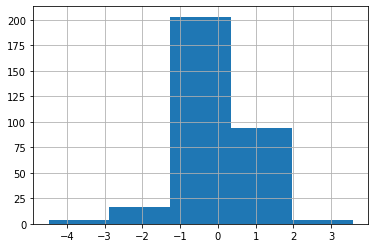

In [358]:
dfTuesday['%D'].hist(bins=5)

Histograma de la variacion diaria en los dias Martes con 30 rangos

<AxesSubplot:>

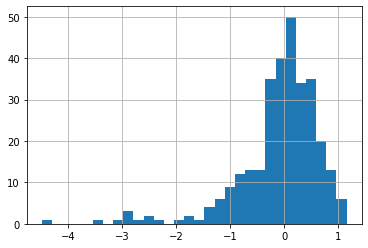

In [359]:
dfTuesday[dfTuesday['%D']<dfTuesday['%D'].quantile(0.95)]['%D'].hist(bins=30)

Rangos de ATR

hay un total de 
    .246 dias entre el rango de 1.105 a 4.04
    .57 dias  entre el rango de 4.04 a 6.96

In [360]:
pd.cut(dfTuesday['ATRREAL'],bins=5).value_counts()

(1.105, 4.04]    246
(4.04, 6.96]      57
(6.96, 9.88]      12
(12.8, 15.72]      5
(9.88, 12.8]       1
Name: ATRREAL, dtype: int64

Analisis de los porcentajes por rango de ATR

Se observa que cuando es dia negativo el 35.20% esta en el rango de ATR de 1 a 4.5 y el 4.98% en el rango 4.5 a 7
Se observa que cuando es dia positivo el 47.35% esta en el rango de STR de 1 a 4.5 y el 6.85% en el rango 4.5 a 7


In [361]:
dfTuesday.groupby(['DayStatus','Bins_ATR'])[['ones']].count()/dfTuesday.groupby(['DayStatus','Bins_ATR'])[['ones']].count().sum()*100

ones
DayStatus Bins_ATR          
-1        (1.0, 4.5]   35.20
          (4.5, 7.0]    4.98
          (7.0, 10.0]   2.18
          (10.0, 13.0]  0.00
          (13.0, 16.0]  1.25
1         (1.0, 4.5]   47.35
          (4.5, 7.0]    6.85
          (7.0, 10.0]   1.56
          (10.0, 13.0]  0.31
          (13.0, 16.0]  0.31

In [384]:
dfTuesdayP.groupby(['DayStatus','Bins_ATR'])[['ones']].count()/dfTuesdayP.groupby(['DayStatus','Bins_ATR'])[['ones']].count().sum()*100

ones
DayStatus Bins_ATR          
-1        (1.0, 4.5]    0.00
          (4.5, 7.0]    0.00
          (7.0, 10.0]   0.00
          (10.0, 13.0]  0.00
          (13.0, 16.0]  0.00
1         (1.0, 4.5]   83.98
          (4.5, 7.0]   12.15
          (7.0, 10.0]   2.76
          (10.0, 13.0]  0.55
          (13.0, 16.0]  0.55

Analisis de los porcentajes por rango de ATR y detallando cada año

In [362]:
dfprueba=dfTuesday.groupby(['year','DayStatus','Bins_ATR'])[['ones']].count()/dfTuesday.groupby(['year','DayStatus','Bins_ATR'])[['ones']].count().sum()*100
dfprueba.reset_index()

,year,DayStatus,Bins_ATR,ones
0,2014,-1,"(1.0, 4.5]",1.56
1,2014,-1,"(4.5, 7.0]",0.00
2,2014,-1,"(7.0, 10.0]",0.00
3,2014,-1,"(10.0, 13.0]",0.00
4,2014,-1,"(13.0, 16.0]",0.00
...,...,...,...,...
65,2020,1,"(1.0, 4.5]",2.80
66,2020,1,"(4.5, 7.0]",4.36
67,2020,1,"(7.0, 10.0]",1.56
68,2020,1,"(10.0, 13.0]",0.31


Histograma de la ATR diaria en los dias Martes con 30 rangos

<AxesSubplot:>

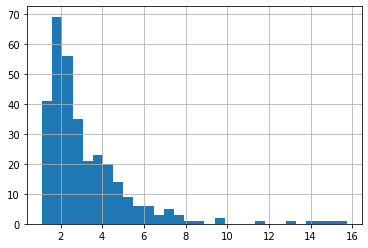

In [363]:
dfTuesday['ATRREAL'].hist(bins=30)

Histograma de la ATR diaria en los dias Martes con 40 rangos, eliminando outliers 5%

<AxesSubplot:>

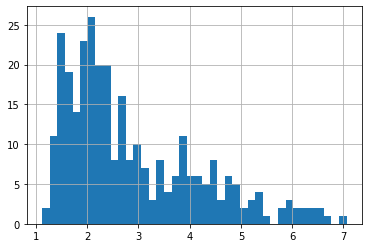

In [364]:
dfTuesday[dfTuesday['ATRREAL']<dfTuesday['ATRREAL'].quantile(0.95)]['ATRREAL'].hist(bins=40)

Rangos de Histograma MACD diaria

hay un total de 
    .276 dias entre el rango de -1.552 a 1.352
    .21 dias  entre el rango de 1.352 a 4.256

In [365]:
pd.cut(dfTuesday['MACDHIST'],bins=5).value_counts()
##pd.cut(dfTuesday['MACDHIST'],bins = [-7.375,-2.52,7.16]).value_counts()


(-1.552, 1.352]     276
(1.352, 4.256]       21
(-4.456, -1.552]     19
(4.256, 7.16]         3
(-7.375, -4.456]      2
Name: MACDHIST, dtype: int64

Histograma del Histograma MACD diaria en los dias Martes con 5 rangos

<AxesSubplot:>

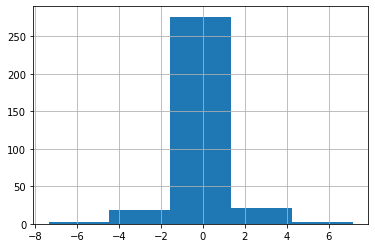

In [366]:
dfTuesday['MACDHIST'].hist(bins=5)

Rangos del RSI diaria

hay un total de 
    .119 dias entre el rango de 46.73 a 59.28
    .113 dias entre el rango de 59.28 a 71.83

In [367]:
pd.cut(dfTuesday['RSI'],bins=5).value_counts()

(46.736, 59.284]    119
(59.284, 71.832]    113
(34.188, 46.736]     51
(71.832, 84.38]      24
(21.577, 34.188]     14
Name: RSI, dtype: int64

Histograma del RSI diaria en los dias Martes con 5 rangos

<AxesSubplot:>

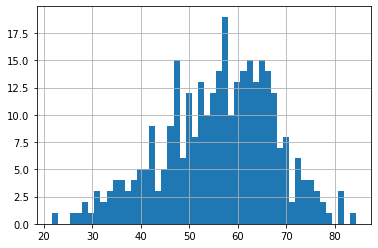

In [368]:
dfTuesday['RSI'].hist(bins=50)

Analisis de los porcentajes por rango de RSI diaria

Se observa que cuando es dia negativo el 16.51% esta en el rango de variacion de 47 a 60 y el 10.90% en el rango 60 a 72
Se observa que cuando es dia positivo el 22.43% esta en el rango de variacion de 60 a 72 y el 21.50% en el rango 47 a 60

In [371]:
dfTuesday.groupby(['DayStatus','Bins_RSI'])[['ones']].count()/dfTuesday.groupby(['DayStatus','Bins_RSI'])[['ones']].count().sum()*100

ones
DayStatus Bins_RSI      
-1        (15, 35]  4.05
          (35, 47] 10.28
          (47, 60] 16.51
          (60, 72] 10.90
          (72, 90]  1.87
1         (15, 35]  0.93
          (35, 47]  6.23
          (47, 60] 21.50
          (60, 72] 22.43
          (72, 90]  5.30

In [385]:
dfTuesdayP.groupby(['DayStatus','Bins_RSI'])[['ones']].count()/dfTuesdayP.groupby(['DayStatus','Bins_RSI'])[['ones']].count().sum()*100

ones
DayStatus Bins_RSI      
-1        (15, 35]  0.00
          (35, 47]  0.00
          (47, 60]  0.00
          (60, 72]  0.00
          (72, 90]  0.00
1         (15, 35]  1.66
          (35, 47] 11.05
          (47, 60] 38.12
          (60, 72] 39.78
          (72, 90]  9.39

Guardamos archivo de los calculos de Martes

In [370]:
dfTuesday

,year,month,day,DayWeek,OpenOk,HighOk,LowOk,Closeok,%D,DayStatus,...,2Crows,3BCrows,Momentum,RSI,BackStatus,TBackStatus,ones,Bins_ATR,Bins_RSI,Bins_%D
200,2014,10,21,Tuesday,191.66,194.71,191.48,194.64,1.55,1,...,0,0,1.43,52.33,1.00,1.00,1,"(1.0, 4.5]","(47, 60]","(1.0, 1.9]"
205,2014,10,28,Tuesday,196.81,199.11,196.73,199.08,1.15,1,...,0,0,13.22,61.94,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(1.0, 1.9]"
210,2014,11,4,Tuesday,201.22,201.59,200.06,201.10,-0.06,-1,...,0,0,6.46,62.83,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(-0.5, 0.0]"
215,2014,11,11,Tuesday,204.05,204.29,203.65,204.17,0.06,1,...,0,0,5.09,68.65,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.0, 0.5]"
220,2014,11,18,Tuesday,204.44,205.91,204.44,205.54,0.54,1,...,0,0,4.44,71.59,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,2020,12,1,Tuesday,365.55,367.65,364.93,365.96,0.11,1,...,0,0,3.51,67.08,-1.00,-1.00,1,"(4.5, 7.0]","(60, 72]","(0.0, 0.5]"
1739,2020,12,8,Tuesday,367.70,370.77,367.67,370.14,0.66,1,...,0,0,12.71,70.10,1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
1744,2020,12,15,Tuesday,367.37,369.57,365.92,369.55,0.59,1,...,0,0,3.59,64.75,-1.00,1.00,1,"(1.0, 4.5]","(60, 72]","(0.5, 1.0]"
1749,2020,12,22,Tuesday,368.20,368.33,366.03,367.21,-0.27,-1,...,0,0,-2.93,57.02,1.00,-1.00,1,"(1.0, 4.5]","(47, 60]","(-0.5, 0.0]"
